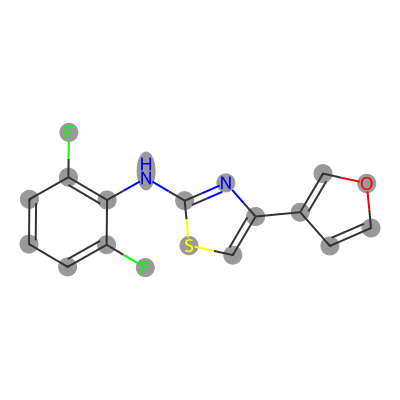

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

# Example molecule
mol = Chem.MolFromSmiles("C1=CC(=C(C(=C1)F)NC2=NC(=CS2)C3=COC=C3)F") 
Chem.rdDepictor.Compute2DCoords(mol)

# Define colors for atom types
atom_colors = {
    6: (0.6, 0.6, 0.6),   # Carbon = light gray
    8: (0.98, 0.6, 0.6),  # Oxygen = soft red/pink
    7: (0.55, 0.63, 0.8), # Nitrogen = light blue
    16: (0.8, 0.8, 0.55), # Sulfur = soft yellow
    17: (0.65, 0.85, 0.65), # Chlorine = light green
    1: (0.9, 0.9, 0.9),   # Hydrogen = very light gray
}


# Default = muted purple (for other atoms)
default_color = (0.8, 0.7, 0.9)

# Assign highlight colors
highlight_atoms = [atom.GetIdx() for atom in mol.GetAtoms()]
highlight_colors = {
    atom.GetIdx(): atom_colors.get(atom.GetAtomicNum(), default_color)
    for atom in mol.GetAtoms()
}

highlight_colors = {atom.GetIdx():(0.6, 0.6, 0.6) for atom in mol.GetAtoms()}


# Draw with transparent background
drawer = rdMolDraw2D.MolDraw2DSVG(400, 400)
drawer.drawOptions().clearBackground = False  # 🔑 makes background transparent

black = (0, 0, 0)
drawer.drawOptions().setAtomPalette({
    1: (1.0, 1.0, 1.0),   # Hydrogen - white
    6: (0.2, 0.2, 0.2),   # Carbon - dark gray/black
    7: (0.0, 0.0, 1.0),   # Nitrogen - blue
    8: (1.0, 0.0, 0.0),   # Oxygen - red
    9: (0.0, 1.0, 0.0),   # Fluorine - green
    16: (1.0, 1.0, 0.0),  # Sulfur - yellow
    17: (0.0, 1.0, 0.0),  # Chlorine - green
})
rdMolDraw2D.PrepareAndDrawMolecule(
    drawer,
    mol,
    highlightAtoms=highlight_atoms,
    highlightAtomColors=highlight_colors
)
drawer.FinishDrawing()

# Clean up RDKit's extra XML headers
svg = drawer.GetDrawingText().replace("svg:", "")
SVG(svg)


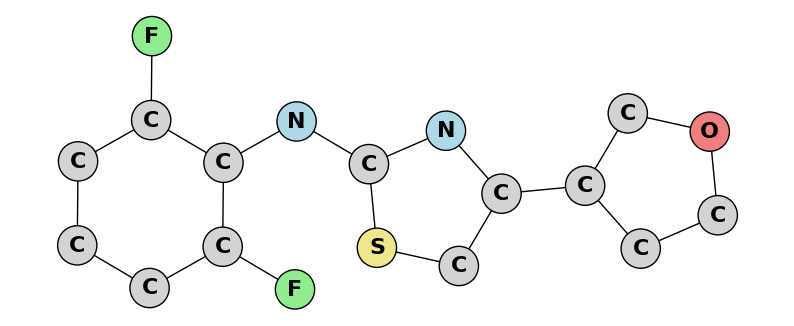

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from rdkit import Chem

# Example molecule
mol = Chem.MolFromSmiles("C1=CC(=C(C(=C1)F)NC2=NC(=CS2)C3=COC=C3)F") 
Chem.rdDepictor.Compute2DCoords(mol)


# Define colors for atom types
atom_colors = {
    6: "lightgray",   # Carbon
    8: "lightcoral",  # Oxygen
    7: "lightblue",   # Nitrogen
    16: "khaki",      # Sulfur
    17: "lightgreen", # Chlorine
    1: "whitesmoke",  # Hydrogen,
    9: (0.56, 0.93, 0.56),   # Fluorine - green
    
}
default_color = "plum"

# Convert RDKit Mol → NetworkX graph
G = nx.Graph()
for atom in mol.GetAtoms():
    idx = atom.GetIdx()
    pos = mol.GetConformer().GetAtomPosition(idx)
    G.add_node(
        idx,
        label=atom.GetSymbol(),
        color=atom_colors.get(atom.GetAtomicNum(), default_color),
        pos=(pos.x, pos.y)  # store RDKit 2D coords
    )
for bond in mol.GetBonds():
    G.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), order=bond.GetBondTypeAsDouble())

# Extract positions
pos = {n: (data["pos"][0], data["pos"][1]) for n, data in G.nodes(data=True)}

# Draw nodes
node_colors = [G.nodes[n]["color"] for n in G.nodes]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800, edgecolors="k")

# Draw edges with bond order as width
# edge_widths = [1.5 * G[u][v]["order"] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos)

# Draw atom labels
labels = {n: G.nodes[n]["label"] for n in G.nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=16, font_weight="bold")

# make larger figure
plt.gcf().set_size_inches(10, 8)
plt.axis("off")
plt.gca().set_aspect("equal", "box")  # keep proportions
plt.show()


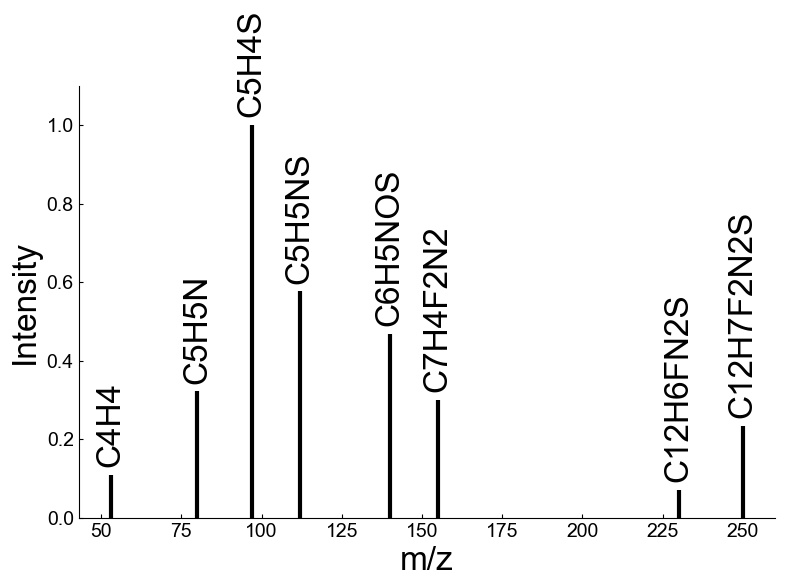

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'

# Example data — replace these with your actual lists
mzs = [ 53.038532,  80.049324,  97.010536, 112.021454, 140.016342,
       155.041351, 230.030716, 250.036758]
intensities = [0.10863, 0.32193, 1.     , 0.57613, 0.46864, 0.30075,
       0.07148, 0.23378]
formulas = ['C4H4', 'C5H5N', 'C5H4S', 'C5H5NS', 'C6H5NOS', 'C7H4F2N2',
       'C12H6FN2S',  'C12H7F2N2S']

plt.figure(figsize=(8, 6))

# Plot spectrum as vertical lines
plt.vlines(mzs, [0], intensities, color='black', linewidth=3)

# Label peaks
for mz, intensity, formula in zip(mzs, intensities, formulas):
    plt.text(
        mz, intensity + max(intensities)*0.02,  # slightly above the peak
        formula, rotation=90, va='bottom', ha='center',
        fontsize=24
    )

# Clean and publication-friendly styling
plt.xlabel('m/z', fontsize=24)
plt.ylabel('Intensity', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(min(mzs) - 10, max(mzs) + 10)
plt.ylim(0, max(intensities) * 1.1)
plt.tight_layout()
plt.tick_params(direction='in', length=3, width=0.8)
# Clean style: only x and y axes, no top/right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Keep x and y axes visible
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Ticks inside for neatness
plt.tick_params(direction='in', length=3, width=0.8)

plt.show()
